In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# first we read the dataset using read csv from panda library
data_dataset = pd.read_csv('data.csv')

In [3]:
#show the data imported from iris.csv
data_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# check for sample size of data
len(data_dataset)

569

In [5]:
#check for dimension of datset
data_dataset.shape

(569, 33)

In [6]:
# check for what are the columns in dataset
data_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
#check for data types
data_dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# more info about dataset
data_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#describe the data
data_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
#check for missing values in data
data_dataset.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
#checking summary of missing values. if there has been any null then the values woould be no of NULL.
data_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
data_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
data_dataset=data_dataset.drop(['id','Unnamed: 32'],axis=1)
data_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data_dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
#Checking the value count of the target column i.e. 'Species' using value_counts()
data_dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

diagnosis = data_dataset['diagnosis']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to convert categories to numerical values
diagnosis_encoded = label_encoder.fit_transform(diagnosis)

# Replace the original 'diagnosis' column with the encoded values
data_dataset['diagnosis'] = diagnosis_encoded.astype(float)

In [17]:
data_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
dataset_new = data_dataset

In [19]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [20]:
new_dataset = pd.DataFrame(dataset_scaled)
new_dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [21]:
#spilting into training and target data
#target data
target_data = new_dataset.iloc[:,0]
target_data.head()

# M :- presence of breast cancer - 1
# B :- absence of breast canccer - 0

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 0, dtype: float64

In [22]:
#training data
clustering_data = new_dataset.iloc[:,[1,2,3,4,5]]
clustering_data.head()

,1,2,3,4,5
0,0.521037,0.022658,0.545989,0.363733,0.593753
1,0.643144,0.272574,0.615783,0.501591,0.289880
2,0.601496,0.390260,0.595743,0.449417,0.514309
3,0.210090,0.360839,0.233501,0.102906,0.811321
4,0.629893,0.156578,0.630986,0.489290,0.430351


In [23]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

array([65.64566416, 33.47102251, 26.97629483, 23.17429554, 19.83143768,
       17.33717967, 15.75225542, 14.57114352, 13.68413522, 12.77214005])

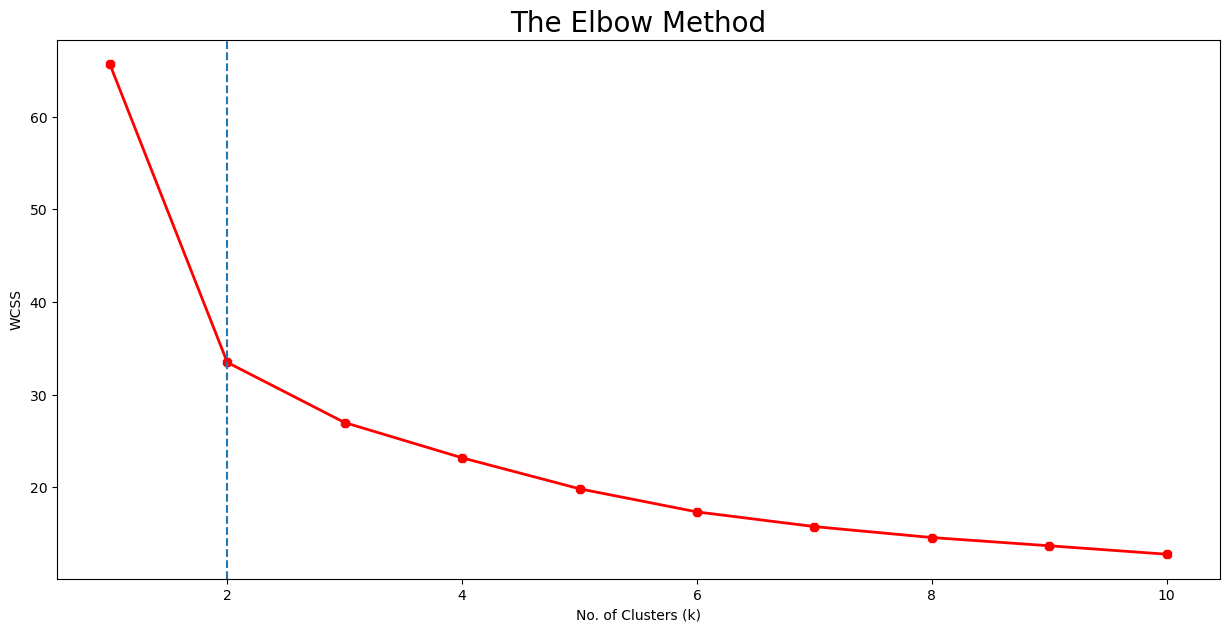

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=2, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [25]:
from sklearn.cluster import KMeans

#convert dataset into array
X = clustering_data.values

#choose the row no of 3 centroids 
initial_indices = np.random.choice(569, size=2, replace=False)
print(initial_indices)
initial_centroids = X[initial_indices]

print("Initial Centroids:")
print(initial_centroids)

kms = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
kms.fit(X)

print("Final Centroids:")
print(kms.cluster_centers_)


[463 224]
Initial Centroids:
[[0.21860949 0.29252621 0.20793311 0.11418876 0.29294935]
 [0.29764778 0.24721001 0.28166678 0.17090138 0.28726189]]
Final Centroids:
[[0.25754168 0.29362709 0.25140866 0.14460985 0.38022388]
 [0.57197373 0.41186226 0.56913828 0.42642165 0.43697047]]


In [26]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.iloc[:,[0,1,2,3,4,5]].values

array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        1.        ],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        1.        ],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        1.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, 0.30311771, 0.28816467,
        1.        ],
       [0.64456434, 0.66351031, 0.66553797, 0.4757158 , 0.58833619,
        1.        ],
       [0.03686876, 0.50152181, 0.02853984, 0.01590668, 0.        ,
        0.        ]])

In [27]:
clusters

,1,2,3,4,5,Cluster_Prediction
0,0.521037,0.022658,0.545989,0.363733,0.593753,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,1
...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,1
565,0.622320,0.626987,0.604036,0.474019,0.407782,1
566,0.455251,0.621238,0.445788,0.303118,0.288165,1
567,0.644564,0.663510,0.665538,0.475716,0.588336,1


In [28]:
kms.cluster_centers_

array([[0.25754168, 0.29362709, 0.25140866, 0.14460985, 0.38022388],
       [0.57197373, 0.41186226, 0.56913828, 0.42642165, 0.43697047]])

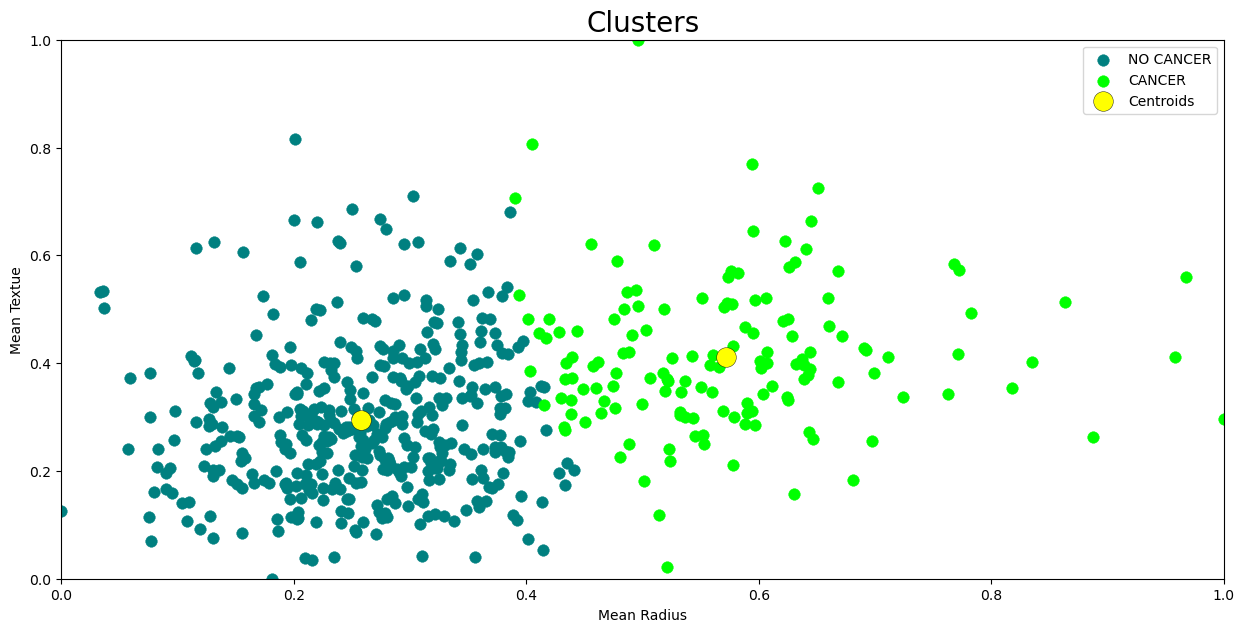

In [29]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0][1],
            y=clusters[clusters['Cluster_Prediction'] == 0][2],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='NO CANCER')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1][1],
            y=clusters[clusters['Cluster_Prediction'] == 1][2],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='CANCER')


plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_ylabel('Mean Texthttp://localhost:8888/notebooks/Documents/Breast_cancer_Kmeans.ipynb#ue')
ax.set_xlabel('Mean Radius')
plt.title('Clusters', fontsize = 20)
plt.show()

In [30]:
# find intra cluster distance

from sklearn.metrics import pairwise_distances

cluster_labels = kms.labels_
centroids = kms.cluster_centers_
num_clusters = 2

distances = pairwise_distances(clustering_data, centroids)

sum_distances_per_cluster = np.zeros(num_clusters)

for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    sum_distances_per_cluster[cluster] = np.sum(distances[cluster_indices, cluster])
    
sum = 0
# Print the sum of distances for each cluster
for cluster, distance_sum in enumerate(sum_distances_per_cluster):
    print(f"Sum of distances for Cluster {cluster + 1}: {distance_sum}")
    sum = sum + distance_sum
    
print("Total sum is :")
print(sum)

Sum of distances for Cluster 1: 89.05016930229259
Sum of distances for Cluster 2: 34.751532452017145
Total sum is :
123.80170175430973


In [47]:
# Actual intra-cluster distances
num_centroids = 2  # Assuming you have 2 centroids
cluster_centers_mean = []

# Calculate the mean centroids from the actual dataset after normalization
for i in range(num_centroids):
    cluster_points = clustering_data[clusters['Cluster_Prediction'] == i]  
    centroid_mean = cluster_points.mean(axis=0)
    cluster_centers_mean.append(centroid_mean)

# Calculate intra-cluster distances for each cluster
intra_cluster_distances_mean = np.zeros(num_centroids)

for i in range(num_centroids):
    cluster_points = clustering_data[clusters['Cluster_Prediction'] == i]
    intra_cluster_distances_mean[i] = np.sum(pairwise_distances(cluster_points, [cluster_centers_mean[i]], metric='euclidean'))

print("Intra-Cluster Distances using mean centroids:", intra_cluster_distances_mean)

# Calculate the sum of intra-cluster distances
total_intra_cluster_distance_mean = np.sum(intra_cluster_distances_mean)
print("Total Intra-Cluster Distance using mean centroids:", total_intra_cluster_distance_mean)


Intra-Cluster Distances using mean centroids: [89.0501693  34.75153245]
Total Intra-Cluster Distance using mean centroids: 123.80170175430979


In [32]:
#find inter cluster distance
from scipy.spatial.distance import pdist, squareform

data = kms.cluster_centers_
print("Centroid: ")
print(data)

distances = squareform(pdist(data, 'euclidean'))
print("Inter cluster distance:")
print(distances)

Centroid: 
[[0.25754168 0.29362709 0.25140866 0.14460985 0.38022388]
 [0.57197373 0.41186226 0.56913828 0.42642165 0.43697047]]
Inter cluster distance:
[[0.        0.5444605]
 [0.5444605 0.       ]]


In [56]:
from scipy.spatial.distance import pdist, squareform

# Calculate the mean centroids from the actual dataset after normalization
num_centroids = 2  # Assuming you have 2 centroids
cluster_centers_mean = []

for i in range(num_centroids):
    cluster_points = clustering_data[clusters['Cluster_Prediction'] == i]  
    centroid_mean = cluster_points.mean(axis=0)
    cluster_centers_mean.append(centroid_mean)

# Calculate inter-cluster distance using mean centroids
inter_cluster_distance_mean = squareform(pdist(cluster_centers_mean, metric='euclidean'))

print("Inter-Cluster Distance using mean centroids:")
print(inter_cluster_distance_mean)


Inter-Cluster Distance using mean centroids:
[[0.        0.5444605]
 [0.5444605 0.       ]]


In [33]:
from collections import Counter

cluster_counts = Counter(cluster_labels)
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} elements")

Cluster 1: 146 elements
Cluster 0: 423 elements


In [34]:
centroid_max = np.max(X, axis=0)
centroid_min = np.min(X, axis=0)
print("max",centroid_max)
print("min",centroid_min)

max [1. 1. 1. 1. 1.]
min [0. 0. 0. 0. 0.]


In [35]:
num_centroids = 2
max_min_centroids = np.random.uniform(centroid_min, centroid_max, size=(num_centroids, len(centroid_max)))

print("Random Centroids:")
print(max_min_centroids)

Random Centroids:
[[0.02096496 0.31826447 0.98763572 0.68379962 0.20797099]
 [0.6786822  0.01388773 0.59564026 0.41565074 0.503968  ]]


In [36]:
kms = KMeans(n_clusters=2, init=max_min_centroids, n_init=1)
kms.fit(X)

print("Final Centroids:")
print(kms.cluster_centers_)

Final Centroids:
[[0.25754168 0.29362709 0.25140866 0.14460985 0.38022388]
 [0.57197373 0.41186226 0.56913828 0.42642165 0.43697047]]


In [37]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.iloc[:,[0,1,2,3,4,5]].values

array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        1.        ],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        1.        ],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        1.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, 0.30311771, 0.28816467,
        1.        ],
       [0.64456434, 0.66351031, 0.66553797, 0.4757158 , 0.58833619,
        1.        ],
       [0.03686876, 0.50152181, 0.02853984, 0.01590668, 0.        ,
        0.        ]])

In [38]:
kms.cluster_centers_

array([[0.25754168, 0.29362709, 0.25140866, 0.14460985, 0.38022388],
       [0.57197373, 0.41186226, 0.56913828, 0.42642165, 0.43697047]])

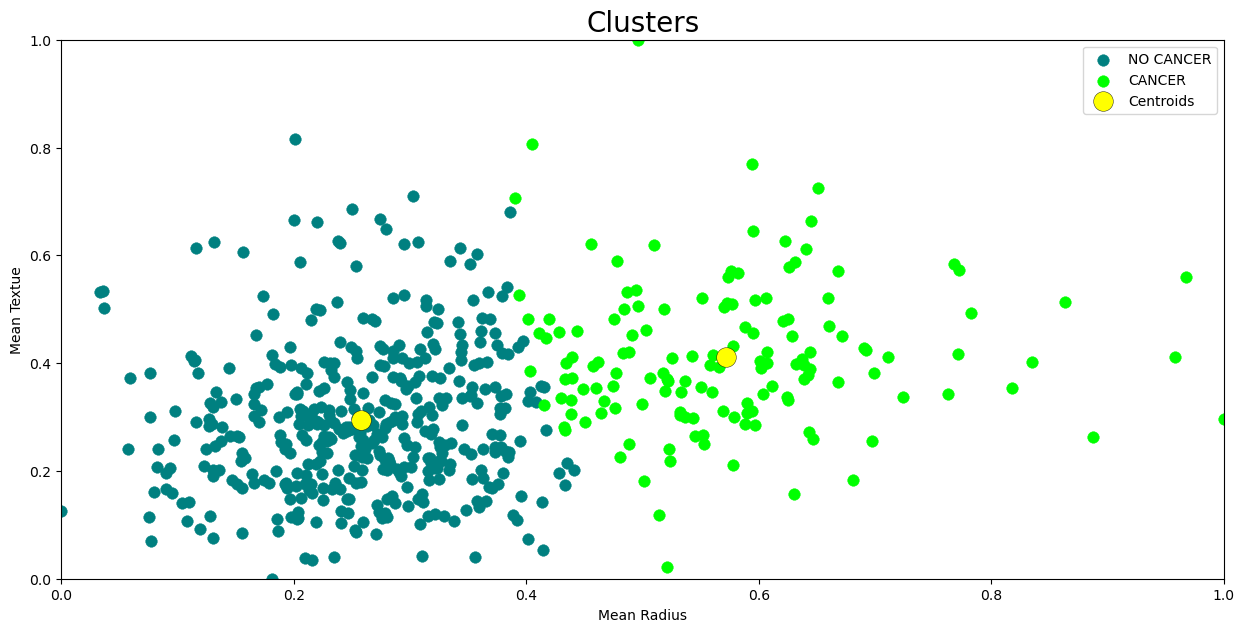

In [39]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0][1],
            y=clusters[clusters['Cluster_Prediction'] == 0][2],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='NO CANCER')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1][1],
            y=clusters[clusters['Cluster_Prediction'] == 1][2],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='CANCER')


plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_ylabel('Mean Textue')
ax.set_xlabel('Mean Radius')
plt.title('Clusters', fontsize = 20)
plt.show()

In [40]:
# find intra cluster distance

from sklearn.metrics import pairwise_distances

cluster_labels = kms.labels_
centroids = kms.cluster_centers_
num_clusters = 2

distances = pairwise_distances(clustering_data, centroids)

sum_distances_per_cluster = np.zeros(num_clusters)

for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    sum_distances_per_cluster[cluster] = np.sum(distances[cluster_indices, cluster])
    
sum = 0
# Print the sum of distances for each cluster
for cluster, distance_sum in enumerate(sum_distances_per_cluster):
    print(f"Sum of distances for Cluster {cluster + 1}: {distance_sum}")
    sum = sum + distance_sum
    
print("Total sum is :")
print(sum)

Sum of distances for Cluster 1: 89.05016930229259
Sum of distances for Cluster 2: 34.751532452017145
Total sum is :
123.80170175430973


In [41]:
#find inter cluster distance

from scipy.spatial.distance import pdist, squareform

data = kms.cluster_centers_
print("Centroid: ")
print(data)

distances = squareform(pdist(data, 'euclidean'))
print("Inter cluster distance:")
print(distances)

Centroid: 
[[0.25754168 0.29362709 0.25140866 0.14460985 0.38022388]
 [0.57197373 0.41186226 0.56913828 0.42642165 0.43697047]]
Inter cluster distance:
[[0.        0.5444605]
 [0.5444605 0.       ]]


In [42]:
from collections import Counter

cluster_counts = Counter(cluster_labels)
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} elements")

Cluster 1: 146 elements
Cluster 0: 423 elements


In [43]:
#actual values: 
# Number of elements in each actual class label
actual_counts = data_dataset['diagnosis'].value_counts()

# Display the number of elements in each actual class label
for species_label, count in actual_counts.items():
    print(f"Species {species_label}: {count} elements")

Species 0.0: 357 elements
Species 1.0: 212 elements


In [44]:
"""#confusion matrix: TP,TN, FP, FN
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Map the predicted cluster labels to the actual species labels
cluster_mapping = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

# Map the cluster labels in the dataframe
clusters['Cluster_Prediction'] = clusters['Cluster_Prediction'].map(cluster_mapping)

# Create the confusion matrix
conf_matrix = confusion_matrix(target_data, clusters['Cluster_Prediction'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_mapping.values(),
            yticklabels=cluster_mapping.values())
plt.title('Confusion Matrix for K-Means Clustering on Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()"""

"#confusion matrix: TP,TN, FP, FN\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\n\n# Map the predicted cluster labels to the actual species labels\ncluster_mapping = {\n    0: 'Iris-setosa',\n    1: 'Iris-versicolor',\n    2: 'Iris-virginica'\n}\n\n# Map the cluster labels in the dataframe\nclusters['Cluster_Prediction'] = clusters['Cluster_Prediction'].map(cluster_mapping)\n\n# Create the confusion matrix\nconf_matrix = confusion_matrix(target_data, clusters['Cluster_Prediction'])\n\n# Plot the confusion matrix using seaborn heatmap\nplt.figure(figsize=(8, 6))\nsns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',\n            xticklabels=cluster_mapping.values(),\n            yticklabels=cluster_mapping.values())\nplt.title('Confusion Matrix for K-Means Clustering on Iris Dataset')\nplt.xlabel('Predicted Label')\nplt.ylabel('True Label')\nplt.show()"

In [45]:
correct_predictions = np.sum(np.diag(conf_matrix))
total_predictions = np.sum(conf_matrix)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2%}")

NameError: name 'conf_matrix' is not defined

In [ ]:
#actual dataset intra cluster distance
from scipy.spatial.distance import euclidean

# Group the dataset by species
grouped_data = data_dataset.groupby('Outcome')

# Calculate intra-cluster distances for each species
intra_cluster_distances_actual = {}

for species_label, group in grouped_data:
    species_data = group.iloc[:, :4].values  # Extracting features (assuming the first 4 columns are features)
    centroid = species_data.mean(axis=0)
    
    distances = [euclidean(point, centroid) for point in species_data]
    intra_cluster_distances_actual[species_label] = np.sum(distances)

# Display intra-cluster distances for each species
for species_label, distance in intra_cluster_distances_actual.items():
    print(f"Intra-Cluster Distance for Species {species_label}: {distance}")
total_intracluster_distance = 0

for species_label, distance in intra_cluster_distances_actual.items():
    total_intracluster_distance += distance

print("Total Intra-Cluster Distance for the Actual Dataset is:", total_intracluster_distance)
